<a href="https://colab.research.google.com/github/1871344park/-/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib


In [ ]:

(train_examples, validation_examples, test_examples) , info = tfds.load('fashion_mnist', with_info=True, as_supervised=True, split=['train[80%:]', 'train[80%:90%]', 'train[90%:]'])

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
num_classes

10

In [ ]:
class_names = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
with open('labels.txt', 'w') as f:
  f.write('\n'.join(class_names))

In [ ]:
IMG_SIZE = 28

In [ ]:
# Write a function to normalize and resize the images

def format_example(image, label):
  # Cast image to float32
  image = tf.cast(image,  tf.float32)
  # Resize the image if necessary
  image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
  # Normalize the image in the range [0, 1]
  image = image/255.0
  return image, label

In [ ]:
# Set the batch size to 32

BATCH_SIZE = 32

In [ ]:
# Prepare the examples by preprocessing the them and then batching them (and optionally prefetching them)

# If you wish you can shuffle train set here
train_batches = train_examples.cache().shuffle(num_examples //4).map(format_example).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_example).batch(BATCH_SIZE).prefetch(1)
test_batches = test_examples.map(format_example).batch(1)

In [ ]:
# """
# Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #
# =================================================================
# conv2d (Conv2D)              (None, 26, 26, 16)        160
# _________________________________________________________________
# max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0
# _________________________________________________________________
# conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640
# _________________________________________________________________
# flatten (Flatten)            (None, 3872)              0
# _________________________________________________________________
# dense (Dense)                (None, 64)                247872
# _________________________________________________________________
# dense_1 (Dense)              (None, 10)                650
# =================================================================
# Total params: 253,322
# Trainable params: 253,322
# Non-trainable params: 0
# """

In [ ]:
# Build the model shown in the previous cell


model = tf.keras.Sequential([
  # Set the input shape to (28, 28, 1), kernel size=3, filters=16 and use ReLU activation,
  tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
  tf.keras.layers.MaxPooling2D(),
  # Set the number of filters to 32, kernel size to 3 and use ReLU activation
  tf.keras.layers.Conv2D(32,3, activation = 'relu'),
  # Flatten the output layer to 1 dimension
  tf.keras.layers.Flatten(),
  # Add a fully connected layer with 64 hidden units and ReLU activation
  tf.keras.layers.Dense(64, activation= 'relu'),
  # Attach a final softmax classification head
  tf.keras.layers.Dense(10 , activation= 'softmax')])

# Set the loss and accuracy metrics
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[ 'accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 64)                247872    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.fit(train_batches,
          epochs=10,
          validation_data=validation_batches)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


375/375 [==============================] - 8s 17ms/step - loss: 0.6445 - accuracy: 0.7725 - val_loss: 0.4551 - val_accuracy: 0.8367
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.4100 - accuracy: 0.8553 - val_loss: 0.3464 - val_accuracy: 0.8760
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.3411 - accuracy: 0.8790 - val_loss: 0.2837 - val_accuracy: 0.8982
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.3013 - accuracy: 0.8898 - val_loss: 0.2583 - val_accuracy: 0.9018
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2683 - accuracy: 0.9025 - val_loss: 0.2218 - val_accuracy: 0.9180
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2405 - accuracy: 0.9087 - val_loss: 0.2092 - val_accuracy: 0.9235
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2111 - accuracy: 0.9197 - val_loss: 0.2097 - val_accuracy: 0.9225
Epoch 8/10

In [ ]:
export_dir = '/content/saved_model'

# Use the tf.saved_model API to export the SavedModel
tf.saved_model.save(model,export_dir)

In [ ]:
# Use the TFLiteConverter SavedModel API to initialize the converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'model.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

In [ ]:

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
output_index

16

In [ ]:
# Gather results for the randomly sampled test images
predictions = []
test_labels = []
test_images = []

for img, label in test_batches.take(50):
  interpreter.set_tensor(input_index, img)
  interpreter.invoke()
  predictions.append(interpreter.get_tensor(output_index))
  test_labels.append(label[0])
  test_images.append(np.array(img))

In [ ]:
# test_images

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  img = np.squeeze(img)

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label.numpy():
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(list(range(10)), class_names, rotation='vertical')
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array[0])

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

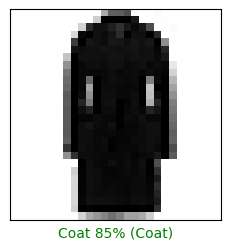

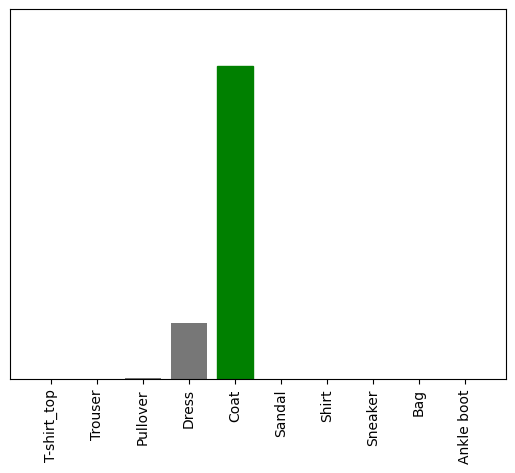

In [ ]:
index = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.show()
plot_value_array(index, predictions, test_labels)
plt.show()

In [ ]:
try:
  from google.colab import files
  files.download(tflite_model_file)
  files.download('labels.txt')
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>